# A Primitive Neural Network implementation with Anaconda

Reference: https://www.youtube.com/watch?v=ILsA4nyG7I0

Hello to Frank Rosenblatt

![Frank Rosenblatt profile](TAHC_rosenblatt-sepia.jpg)

In [354]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.lines as lin
import traceback

from ipywidgets import widgets
from ipywidgets.widgets import *
from IPython.display import display

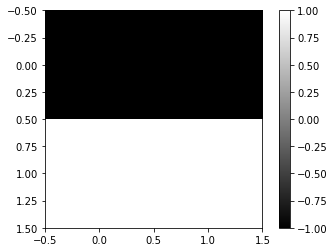

In [128]:
im = np.array([-1,-1,1,1])

def implot(im):
    plt.imshow(im.reshape(2,2),cmap='gray',vmax=1,vmin=-1);
    plt.colorbar();

implot(im)

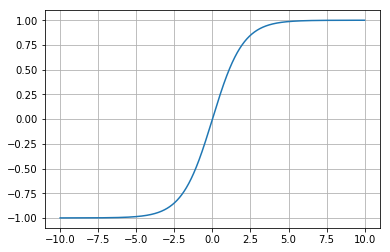

In [235]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) * 2 - 1
    #return 1 / (1 + np.exp(-x))

x = np.arange(-10,10,0.01)
plt.plot(x, sigmoid(x));
plt.grid();

[ 0.          0.         -0.76159416 -0.76159416]


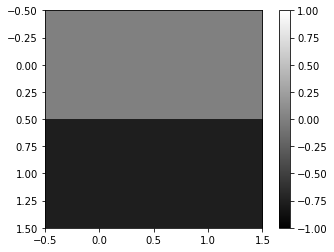

In [236]:
l1w = [
    [1,0,1,0],
    [0,1,0,1],
    [1,0,-1,0],
    [0,1,0,-1],
]

l1m = l1w * im
l1s = sigmoid(np.sum(l1m,1))
print(l1s)
implot(l1s)

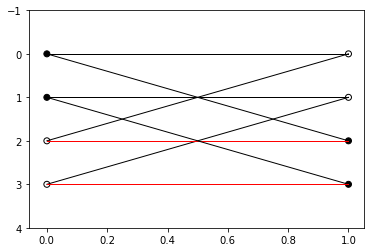

In [409]:
def plotnodes(wl,sl=None):
    """
    wl: a list of weight matrix for each layer of newral network.
    """
    fig, ax = plt.subplots()
    l1 = lin.Line2D([-1,-1],[1,1], transform=fig.transFigure, figure=fig, color='r', linewidth=5)
    fig.lines.extend([l1])
    fig.canvas.draw()
    if sl != None:
        smax = np.max([np.max(x) for x in sl])
    for n in range(len(wl)):
        w = wl[n]
        if sl != None:
            c1 = sl[n] / smax
            c2 = sl[n+1] / smax
        else:
            c1 = 0.5*np.ones(np.shape(w)[1])
            c2 = 0.5*np.ones(np.shape(w)[0])
        ax.scatter(n+np.zeros(np.shape(w)[1]), range(np.shape(w)[1]), c=c1, cmap='gray', edgecolor='black')
        ax.scatter(n+np.ones(np.shape(w)[0]), range(np.shape(w)[0]), c=c2, cmap='gray', edgecolor='black')
        for i in range(len(w)):
            start = w[i]
            for j in range(len(start)):
                ax.plot([n,n+1],[j,i], linewidth=min(10,abs(start[j])), color='k' if 0 < start[j] else 'r')
    ax.set_ylim(np.max([len(x) for x in wl]),-1)

plotnodes([l1w], [im + 1, l1s])

[ 0.          0.          0.         -0.64201499]


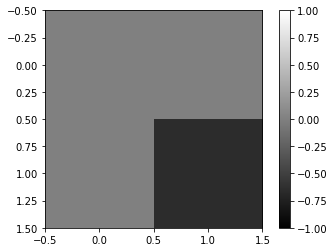

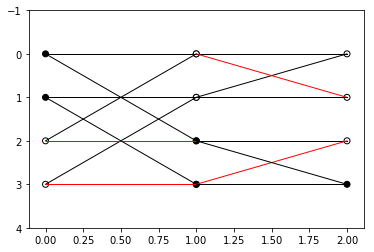

In [238]:
l2w = [
    [1,1,0,0],
    [-1,1,0,0],
    [0,0,1,-1],
    [0,0,1,1],
]

l2s = sigmoid(np.sum(l2w * l1s,1));
print(l2s)
implot(l2s)
plotnodes([l1w,l2w], [im,l1s,l2s])

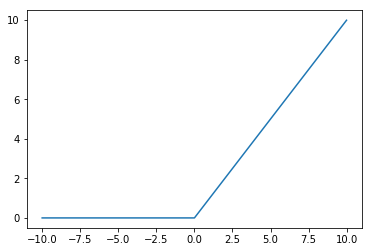

In [239]:
def relu(x):
    return np.maximum(x,0)

plt.plot(x,relu(x));

[ 0.          0.          0.          0.          0.          0.          0.
  0.64201499]


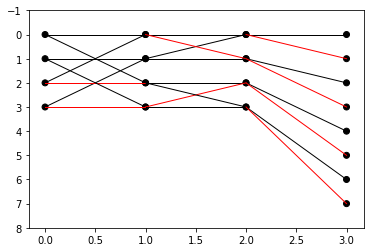

In [410]:
l3w = [
    [1,0,0,0],
    [-1,0,0,0],
    [0,1,0,0],
    [0,-1,0,0],
    [0,0,1,0],
    [0,0,-1,0],
    [0,0,0,1],
    [0,0,0,-1],
]

l3s = np.sum(relu(l3w * l2s),1)
plotnodes([l1w,l2w,l3w],None)
print(l3s)

In [433]:
def forward(x,w):
    l1m = w[0] * np.array(x)
    l1s = sigmoid(np.sum(l1m,1)).T
    l2s = sigmoid(np.sum(w[1] * l1s,1)).T
    l3s = relu(np.sum(w[2] * l2s,1)).T
    return l3s, l1s, l2s

In [367]:
nah = np.random.random((1,4))
print(nah, '\n', nah * np.array([0,1,0,0]))
print(np.zeros((8,4)) + np.ones((8,1)))

[[ 0.2675699   0.96610728  0.70567213  0.06461365]] 
 [[ 0.          0.96610728  0.          0.        ]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


6 (horizontal) is most likely


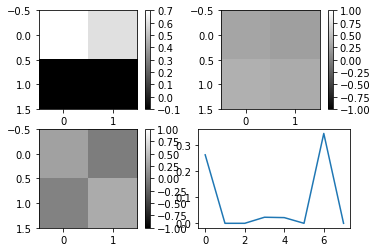

In [434]:
candidate_names = [
    'solid',
    'vertical',
    'diagonal',
    'horizontal'
]

def pltnn(a,b,c,d):
    plt.subplot(221)
    axim = plt.imshow(np.array([a,b,c,d]).reshape(2,2),cmap='gray')
    plt.colorbar(axim)
    l3s, l1s, l2s = forward([a,b,c,d],[l1w,l2w,l3w])
    plt.subplot(222)
    implot(l1s)
    plt.subplot(223)
    implot(l2s)
    plt.subplot(224)
    plt.plot(l3s)
    ans = l3s.argmax()
    print(ans, '(' + candidate_names[ans//2] + ') is most likely')
    #plt.show()

pixrange = (-1,1,0.1)
interact(pltnn, a=pixrange, b=pixrange, c=pixrange, d=pixrange);

# Backpropagation

For sigmoid function

$$
f(x)=\frac 2{1 + e^{-x}}-1 \\
f'(x) = \frac{\partial f}{\partial x} = \frac {2e^{-x}}{\{1 + e^{-x}\}^2} = (1 - f(x)) \cdot f(x)
$$

And for ReLU function

$$
R(x) =
\begin{cases}
x & \mathrm{if\ } 0 < x \\
0 & \mathrm{otherwise}
\end{cases}
\\
R'(x) =
\begin{cases}
1 & \mathrm{if\ } 0 < x \\
0 & \mathrm{otherwise}
\end{cases}
$$

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.64201499]] [[ 0.5       ]
 [ 0.5       ]
 [ 0.5       ]
 [ 0.45182045]]


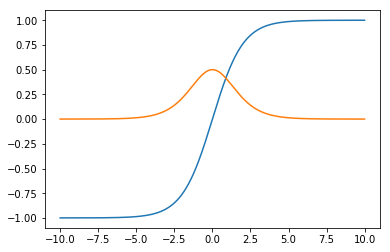

In [430]:
def grad_sigmoid(x):
    return 2 * np.exp(-x) / (1 + np.exp(-x)) ** 2
print(l2s.reshape((4,1)), grad_sigmoid(l2s.reshape((4,1))))

plt.plot(x, np.transpose([sigmoid(x), grad_sigmoid(x)]));

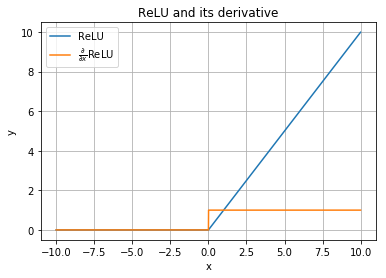

In [193]:
def grad_relu(x):
    return np.array(0 < x,dtype=float)

plt.plot(x, np.transpose([relu(x), grad_relu(x)]));
plt.grid()
plt.title('ReLU and its derivative')
plt.legend([r'ReLU', r'$\frac{\partial}{\partial x} \mathrm{ReLU}$'])
plt.xlabel('x')
plt.ylabel('y');

## Nodes with multiple outputs

What happens if a node has more than one outputs?
Suppose we have $F_1(x)$ and $F_2(x)$ which are functions of previous layer $g(x)$

$$
F_1(x) = f_1(g(x)) \\
F_2(x) = f_2(g(x))
$$

And we got loss function for each of the output functions

$$
L = \{A_1 - F_1(x)\} + \{A_2 - F_2(x)\}
$$

We can compute the contribution of loss for each node in the last layer.

$$
\frac{\partial L}{\partial F_1} = -1, \frac{\partial L}{\partial F_2} = -1
$$

Actually they are summed up to a single loss function at the point of the previous layer.

$$
\frac{\partial L}{\partial g} = \frac{\partial L}{\partial f_1} + \frac{\partial L}{\partial f_2}
$$

Using chain rule in calculus, we get this

\begin{align*}
\frac{\partial L}{\partial g} =& \frac{\partial L}{\partial F_1} \frac{\partial F_1}{\partial f_1} + \frac{\partial L}{\partial F_2} \frac{\partial F_2}{\partial f_2} \\
=& -\frac{\partial F_1}{\partial f_1} - \frac{\partial F_2}{\partial f_2}
\end{align*}


## Don't we need inverse matrix for backpropagation?

A layer seems like

$$
f_{i+1} = W_i f_{i}
$$

But we have gradients 

$$
\frac{\partial L}{\partial f_{i+1}}
$$

## Regularizations

How do we regularize loss function of a neural network?

initial weights [array([[-0.05246091, -0.039881  ,  0.08176734, -0.10523985],
       [ 0.03785331, -0.11028912,  0.14486917,  0.13929622],
       [ 0.04937422,  0.04099589, -0.02928069,  0.08739899],
       [ 0.03545696, -0.14086406, -0.00424289, -0.02954784],
       [-0.00388972, -0.10259377,  0.05824525, -0.09263701],
       [ 0.11320625,  0.11094774,  0.14090432, -0.06335616]]), array([[ 0.00103711, -0.04605866,  0.002837  ,  0.05799139, -0.08900568,
         0.11707531],
       [ 0.06076079, -0.07366057, -0.08338642, -0.04314004, -0.07721051,
        -0.01744985],
       [ 0.09187   ,  0.0553409 ,  0.09082859,  0.14719915,  0.10946659,
         0.09431364],
       [-0.02449965,  0.14246311,  0.08635158, -0.11046388, -0.13712101,
         0.05868961],
       [ 0.02314781, -0.03167483, -0.00854341, -0.08369244, -0.12554918,
        -0.02200634],
       [ 0.07220407,  0.07547605, -0.13884065, -0.05743387,  0.14609185,
        -0.05674024],
       [-0.03952697, -0.0928812 ,  0.01095912

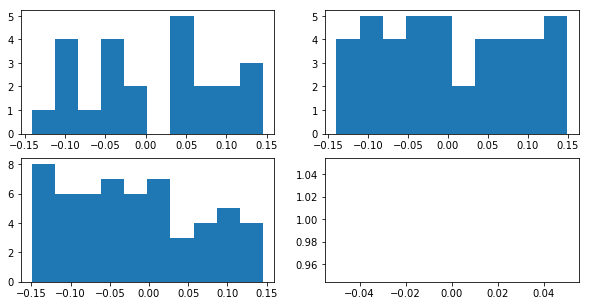

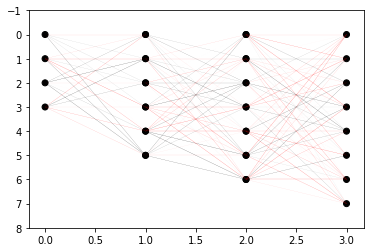

In [492]:
loss_history = []
regulator = 0.0001

def backward(im,ans,w):
    global loss_history
    l3s, l1s, l2s = forward(im,w)
    loss = ans - l3s
    loss_history.append(loss.dot(loss))
    if len(loss_history) < 10:
        print('L = ', loss.dot(loss))
        print('d(L)/d(l3s) = ',(loss))
        print(sum(grad_relu(l2s) * np.array(loss).reshape((len(loss),1))))
    l3l = grad_relu(l2s) * np.matmul(w[2].T, loss)
    #print('l2s', l2s.T, 'loss', loss, 'l3l', sum(l2s * loss.reshape((len(loss),1))))
    w[2] += 0.01 * loss.reshape((len(loss),1)) * (1 - regulator * sum(sum(w[2]*w[2])))
    if (1e3 < abs(w[2])).any():
        print('warning! w[2] ', w[2])
        raise Exception('w[2] diverges')
    #print(l3l)
    l2l = grad_sigmoid(l1s) * np.matmul(w[1].T, l3l)
    #print('l2l', l2l.shape, 'l2s', l2s.shape)
    #l2l.shape = (len(l2l),1)
    w[1] += 0.01 * l2l * (1 - regulator * sum(sum(w[1]*w[1])))
    if (1e3 < abs(w[1])).any():
        print('warning! w[1] ', w[1])
        raise Exception('w[1] diverges')
    print('l1s', l1s.shape, 'l2s', l2s.shape, 'l3s', l3s.shape, 'w[0].T', w[0].T.shape, 'l2l', l2l.shape, 'np.matmul(w[0].T, l2l)', np.matmul(w[0].T, l2l).shape)
    l1l = (grad_sigmoid(l1s) * np.matmul(w[0].T, l2l))
    #print('l2l', l2l, 'l1l', l1l)
    #l1l.shape = (len(l1l),1)
    #print('l1l', l1l.shape, 'l1s', l1s.shape, 'l1s g', grad_sigmoid(l1s).shape, 'l2l', l2l.shape)
    w[0] = w[0] + 0.01 * l1l * (1 - regulator * sum(sum(w[0]*w[0])))
    if (1e3 < abs(w[0])).any():
        print('warning! w[0] ', w[0])
        raise Exception('w[0] diverges')
    return w

weights = [0.3*(np.random.random((6,len(im)))-0.5),
           0.3*(np.random.random((7,6))-0.5),
           0.3*(np.random.random((8,7))-0.5)]
print('initial weights', weights)
normal_scale = 0.0001
try:
    for i in range(150):
        weights = backward(np.random.normal(im,normal_scale),[0,0,0,0,0,0,0,1], weights)
        weights = backward(np.random.normal([1,1,-1,-1],normal_scale),[0,0,0,0,0,0,1,0], weights)
        weights = backward(np.random.normal([-1,-1,-1,-1],normal_scale),[1,0,0,0,0,0,0,0], weights)
        weights = backward(np.random.normal([1,1,1,1],normal_scale),[0,1,0,0,0,0,0,0], weights)
        weights = backward(np.random.normal([1,-1,-1,1],normal_scale),[0,0,1,0,0,0,0,0], weights)
        weights = backward(np.random.normal([-1,1,1,-1],normal_scale),[0,0,0,1,0,0,0,0], weights)
        weights = backward(np.random.normal([-1,1,-1,1],normal_scale),[0,0,0,0,1,0,0,0], weights)
        weights = backward(np.random.normal([1,-1,1,-1],normal_scale),[0,0,0,0,0,1,0,0], weights)
except Exception as e:
    print(e)
    print(traceback.format_exc())
print('final weights', weights)
fig, ax = plt.subplots(2,2,figsize=(10,5))
ax[0,0].hist(weights[0].flat)
ax[0,1].hist(weights[1].flat)
ax[1,0].hist(weights[2].flat)
ax[1,1].plot(loss_history)
plotnodes(weights)

4 (diagonal) is most likely


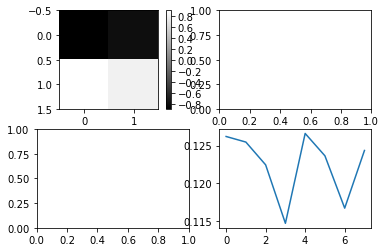

In [479]:
def pltnn(a,b,c,d):
    plt.subplot(221)
    axim = plt.imshow(np.array([a,b,c,d]).reshape(2,2),cmap='gray')
    plt.colorbar(axim)
    l3s, l1s, l2s = forward([a,b,c,d],weights)
    plt.subplot(222)
    #implot(l1s)
    plt.subplot(223)
    #implot(l2s)
    plt.subplot(224)
    plt.plot(l3s)
    ans = l3s.argmax()
    print(ans, '(' + candidate_names[ans//2] + ') is most likely')
    #plt.show()

pixrange = (-1,1,0.1)
interact(pltnn, a=pixrange, b=pixrange, c=pixrange, d=pixrange);